In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [3]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784',version=1,cache=True,as_frame=False)
    mnist.target = mnist.target.astype(np.int8)
    sort_by_target(mnist)
except:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"],mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [4]:
mnist.data.shape

(70000, 784)

In [5]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [6]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array([0, 0, 0, ..., 9, 9, 9], dtype=int8),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel

In [7]:
y.shape

(70000,)

In [8]:
import matplotlib as mpl
import os

In [9]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [10]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure some_digit_plot


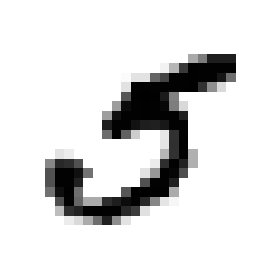

In [11]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=mpl.cm.binary,interpolation='nearest')
plt.axis('off')

save_fig("some_digit_plot")
plt.show()

In [12]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image,cmap=mpl.cm.binary,interpolation="nearest")
    plt.axis("off")

In [13]:
def plot_digits(instances, images_per_row=10, **options):
    size=28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances)-1)// images_per_row+1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size,size*n_empty)))
    for row in range(n_rows):
        rimages = images[row*images_per_row : (row+1)*images_per_row]
        row_images.append(np.concatenate(rimages,axis=1))
    image = np.concatenate(row_images,axis=0)
    plt.imshow(image,cmap=mpl.cm.binary,**options)
    plt.axis("off")

Saving figure more_digits_plot


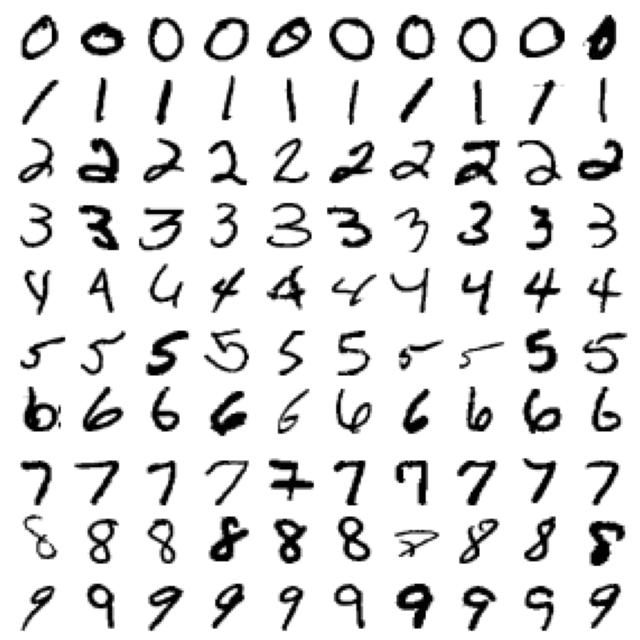

In [14]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images)
save_fig("more_digits_plot")
plt.show()

In [15]:
y[36000]

5

In [16]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [17]:
shuffle_index = np.random.permutation(60000)
shuffle_index

array([25736, 27629, 26165, ..., 51844, 55300, 26413])

In [18]:
shuffle_index.size

60000

In [19]:
X_train, y_train = X_train[shuffle_index],y_train[shuffle_index]

# Binary Classifier

In [20]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [21]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(max_iter=5, random_state=42, tol=-inf)

In [22]:
sgd_clf.predict([some_digit])

array([ True])

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9504 , 0.9617 , 0.96875])

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))

0.9608
0.94855
0.87385


In [25]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [26]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90805, 0.9069 , 0.914  ])

In [27]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)

array([[54207,   372],
       [ 2011,  3410]], dtype=int64)

In [29]:
y_train_perfect_predictions = y_train_5

In [30]:
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [31]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5,y_train_pred)

0.9016393442622951

In [32]:
3555/(3555+1632)

0.6853672643146327

In [33]:
recall_score(y_train_5,y_train_pred)

0.6290352333517801

In [34]:
3555/(3555+1866)

0.6557830658550083

In [35]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7410626969466478

In [36]:
3555/(3555 + (1631+1866)/2)

0.6703120580748563

In [37]:
y_scores = sgd_clf.decision_function([some_digit])

In [38]:
y_scores

array([56869.46264466])

In [39]:
threshold = 0
y_some_digit_pred = (y_scores> threshold)

In [40]:
y_some_digit_pred

array([ True])

In [41]:
threshold = -20000
y_some_digit_pred = (y_scores> threshold)
y_some_digit_pred

array([ True])

In [42]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [43]:
y_scores.shape

(60000,)

In [44]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

In [45]:
precisions

array([0.09076601, 0.09075079, 0.09075231, ..., 1.        , 1.        ,
       1.        ])

Saving figure plot_precision_recall_vs_threshold


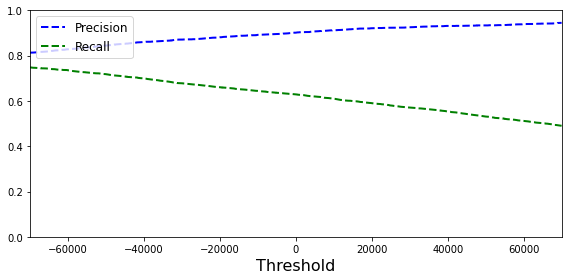

In [47]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],"b--",label="Precision",linewidth=2)
    plt.plot(thresholds,recalls[:-1],"g--",label="Recall",linewidth=2)
    plt.xlabel("Threshold",fontsize=16)
    plt.legend(loc='upper left',fontsize=12)
    plt.ylim([0,1])

plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.xlim([-70000,70000])
save_fig("plot_precision_recall_vs_threshold")
plt.show()

In [48]:
(y_train_pred==(y_scores>0)).all()

True

In [49]:
y_train_pred_90 = (y_scores>70000)

In [50]:
precision_score(y_train_5,y_train_pred_90)

0.9448986846782794

In [51]:
recall_score(y_test_5,y_train_pred_90)

ValueError: Found input variables with inconsistent numbers of samples: [10000, 60000]

In [52]:
y_train_5

array([False, False, False, ..., False, False, False])

In [53]:
y_train_5.shape

(60000,)

Saving figure plot_precision_vs_recall


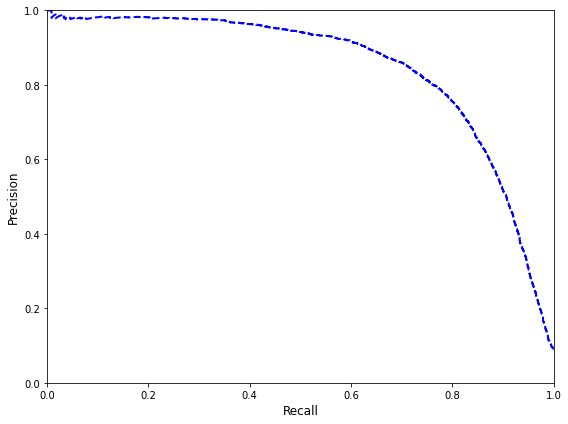

In [55]:
def plot_precision_vs_recall(precisions,recalls):
    plt.plot(recalls,precisions,"b--", linewidth=2)
    plt.xlabel("Recall",fontsize=12)
    plt.ylabel("Precision",fontsize=12)
    plt.axis([0,1,0,1])

plt.figure(figsize=(8,6))
plot_precision_vs_recall(precisions,recalls)
save_fig("plot_precision_vs_recall")
plt.show()

# ROC Curves

In [56]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)

Saving figure roc_curve_plot


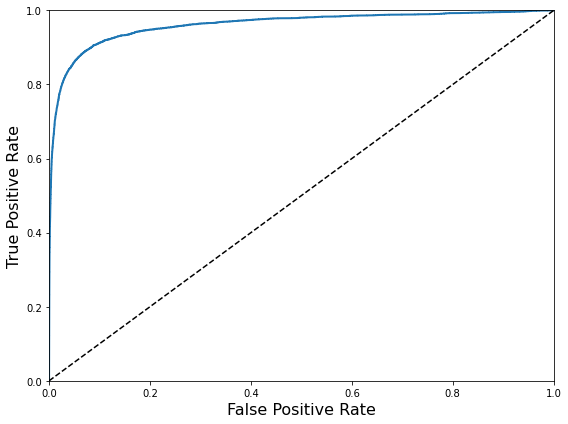

In [57]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    
plt.figure(figsize=(8,6))
plot_roc_curve(fpr,tpr)
save_fig("roc_curve_plot")
plt.show()

In [58]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_scores)

0.9608269817093908

In [59]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10,random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

In [62]:
y_probas_forest.shape

(60000, 2)

In [63]:
y_scores_forest = y_probas_forest[:,1] #score = probability of a positive class
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Saving figure roc_curve_comparison_plot


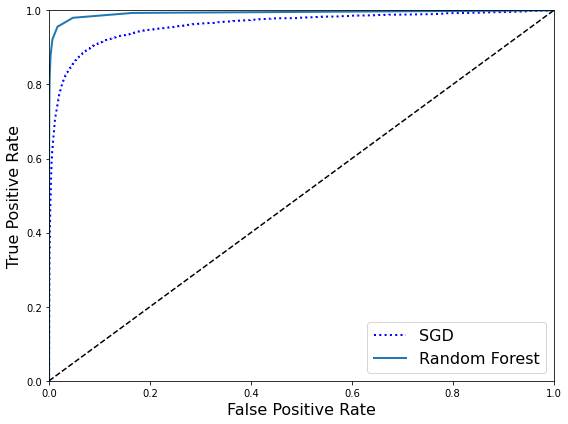

In [64]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [65]:
roc_auc_score(y_train_5,y_scores_forest)

0.9930090201376058

In [66]:
y_train_pred_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3)
precision_score(y_train_5,y_train_pred_forest)

0.9853658536585366

In [67]:
recall_score(y_train_5,y_train_pred_forest)

0.8197749492713522

# Multiclass Classification

In [68]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([5], dtype=int8)

In [69]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-105191.6345748 , -415574.58226543, -318358.26026142,
        -284125.34137778, -530815.50258877,  -23959.81497243,
        -580737.25087997, -201215.15817783, -682166.3423822 ,
        -612293.58069923]])

In [70]:
np.argmax(some_digit_scores)

5

In [71]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [72]:
sgd_clf.classes_[5]

5

In [73]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5,tol=-np.infty,random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

array([3], dtype=int8)

In [74]:
len(ovo_clf.estimators_)

45

In [75]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

array([5], dtype=int8)

In [76]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0.1, 0. , 0. ]])

In [77]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.8684 , 0.8625 , 0.83855])

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")

array([0.91115, 0.9086 , 0.91015])

In [80]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

array([[5731,    3,   20,   11,   10,   48,   49,   10,   39,    2],
       [   1, 6491,   46,   24,    6,   41,    6,    8,  103,   16],
       [  50,   40, 5336,   98,   83,   24,   72,   62,  174,   19],
       [  49,   45,  143, 5338,    4,  239,   33,   55,  134,   91],
       [  20,   29,   40,    6, 5376,   11,   56,   34,   82,  188],
       [  72,   46,   31,  201,   72, 4593,  111,   26,  181,   88],
       [  32,   28,   39,    3,   39,   89, 5624,    9,   55,    0],
       [  22,   23,   62,   30,   57,   10,    6, 5823,   16,  216],
       [  52,  159,   66,  147,   12,  153,   61,   29, 5040,  132],
       [  38,   39,   23,   88,  169,   47,    3,  207,   89, 5246]],
      dtype=int64)

In [81]:
def plot_confusion_matrix_matrix(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax  =ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure confusion_matrix_plot


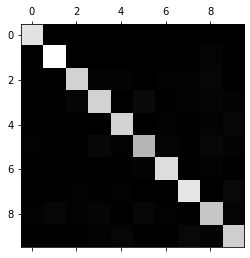

In [82]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
save_fig("confusion_matrix_plot",tight_layout=False)
plt.show()

In [83]:
row_sums = conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx/row_sums

Saving figure confusion_matrix_errors_plot


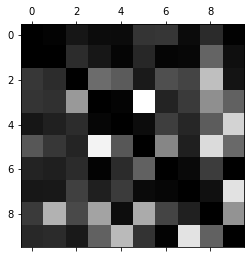

In [84]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot",tight_layout=False)
plt.show()

Saving figure error_analysis_digits_plot


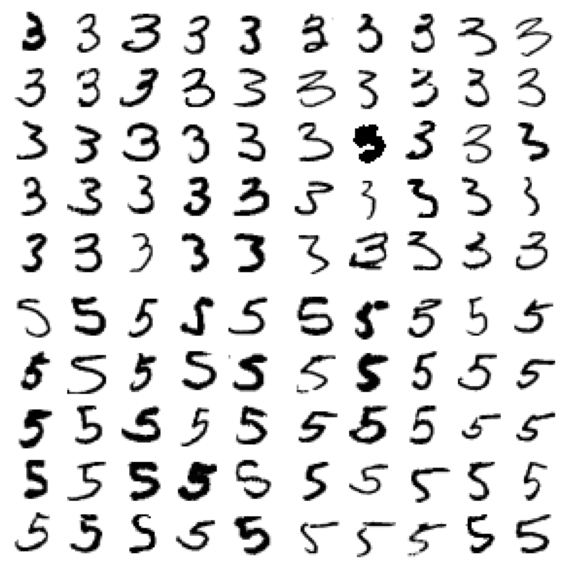

In [85]:
cl_a,cl_b=3,5
X_aa = X_train[(y_train==cl_a) & (y_train_pred==cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221);plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

# Multilabel Classification

In [86]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train>=7)
y_train_odd = (y_train%2 ==1)
y_multilabel = np.c_[y_train_large,y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [87]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [91]:
print(y_multilabel)
y_multilabel.shape

[[False False]
 [False False]
 [False False]
 ...
 [ True False]
 [ True  True]
 [False False]]


(60000, 2)

In [92]:
y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_multilabel,cv=3,n_jobs=-1)
f1_score(y_multilabel,y_train_knn_pred,average="macro")

0.9771321813021402

# Multioutput Classification

In [93]:
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100, (len(X_test),784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Saving figure noisy_digit_example_plot


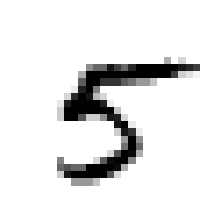

In [94]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(121); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

Saving figure cleaned_digit_example_plot


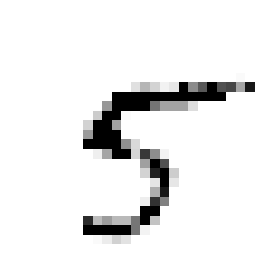

In [95]:
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")